In [1]:
from koala.analysis import PDTable
import numpy as np
from grizli import utils

import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [2]:
# pd_tab = PDTable.from_query(
#     "SELECT root, id, ra, dec, z_map, q_z, bic_diff, cdf_z FROM redshift_fit "
#     "WHERE t_g141 > 1000 AND status = 6 AND z_map > 0.6" # AND root = 'j021744m0346'"
#     " AND bic_diff > 0 AND chinu < 5")

pd_tab = PDTable.from_pickle("./proj_density_tab.pkl")

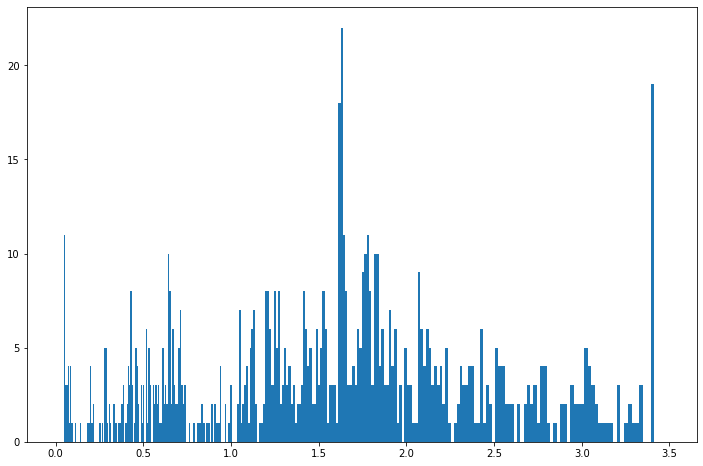

In [3]:
ax = pd_tab.plot.redshift_map()
ax

### Show the PDF distribution of a reasonably well-fit object

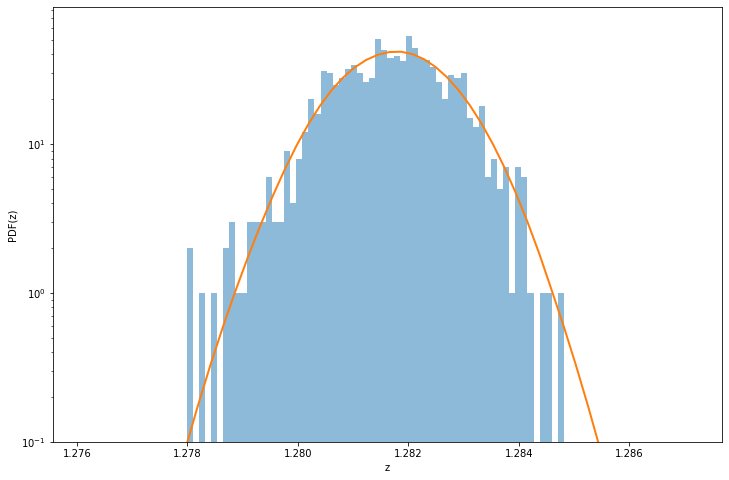

In [12]:
pd_tab_400 = pd_tab.with_mask((pd_tab['id'] == 400))

pd_tab_400.plot.pdf_of_z(s_grid=np.linspace(-5, 5, 51))

### Show the PDF distribution of a degenerate solution

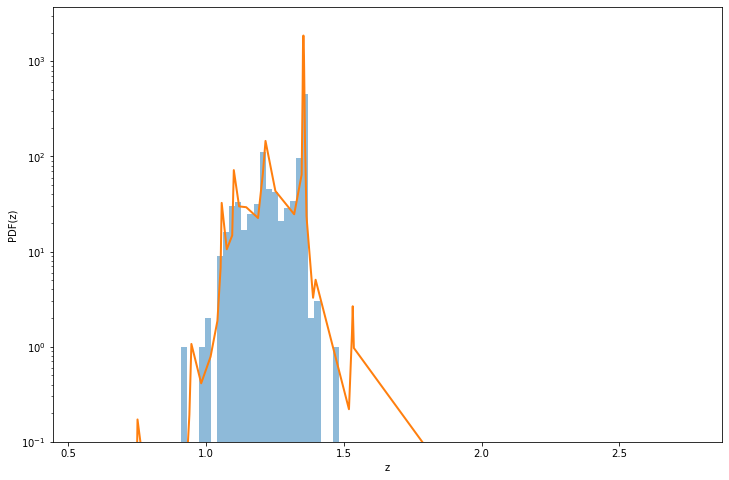

In [17]:
pd_tab_500 = pd_tab.with_mask((pd_tab['id'] == 500))

pd_tab_500.plot.pdf_of_z(s_grid=np.linspace(-5, 5, 51))

## Random redshift draws from $CDF(z)$

100%|██████████| 817/817 [00:00<00:00, 3625.65it/s]
/Users/nearl/projects/koala/koala/plotting.py:118: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  ax.plot(hx[1][1:], hx[0]/num, linestyle='steps-pre')


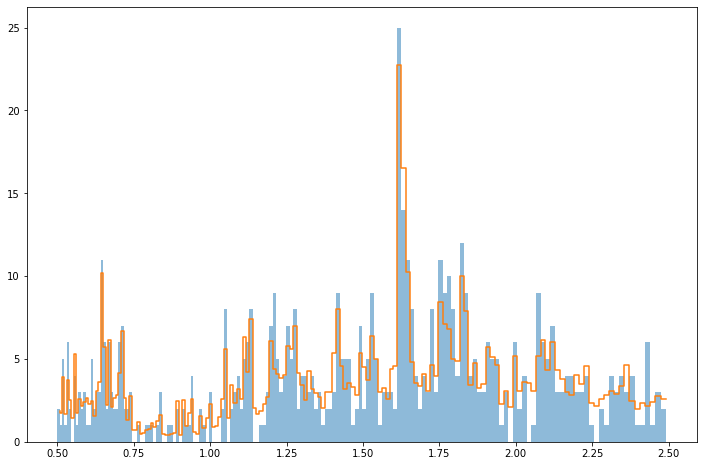

In [18]:
z_draws = pd_tab.redshift_draws(s_grid=np.linspace(-5, 5, 51), num=1000)
z_cm = utils.log_zgrid([0.1, 3.5], 0.01)

ax = pd_tab.plot.compare_redshift_draws(z_draws=z_draws)

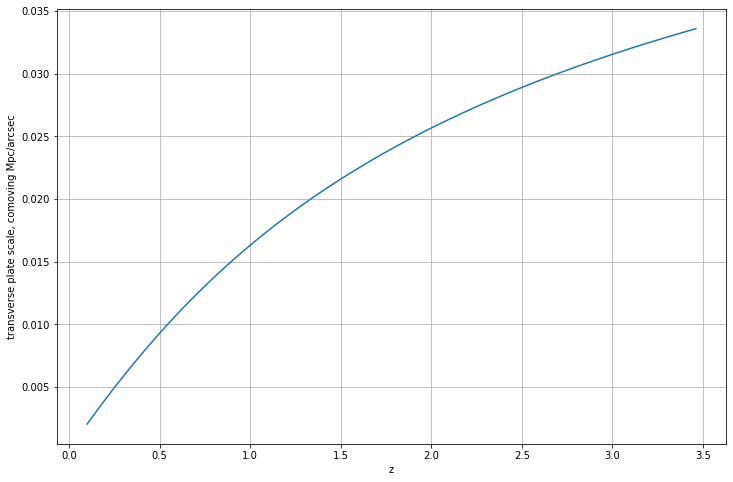

In [20]:
pd_tab.plot.transverse_plate_scale(z_cm)

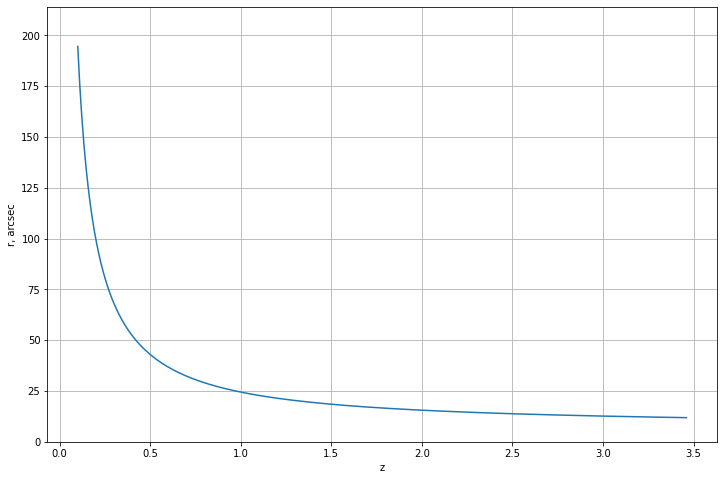

In [21]:
pd_tab.plot.separation_radius(z_cm)

100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


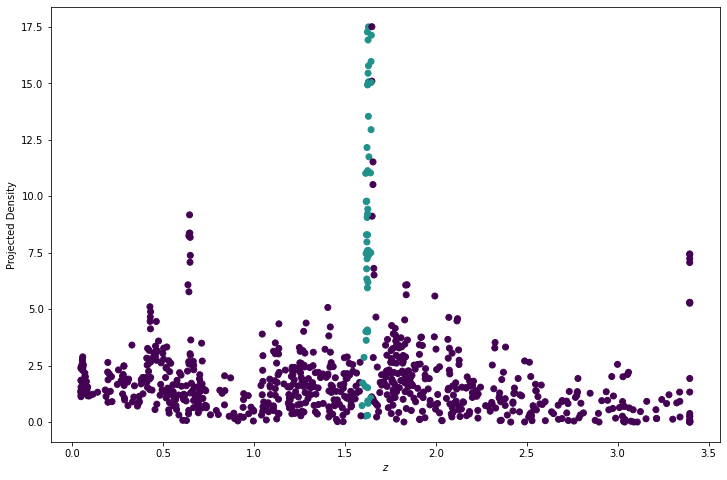

In [23]:
projected_densities, dr, dd = pd_tab.spatial_query(z_draws, z_cm)

pd_tab.plot.spatial_query(projected_densities, z_cluster=1.62, vmax=2)

(<matplotlib.axes._subplots.AxesSubplot at 0x1248f66a0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x123c166a0>)

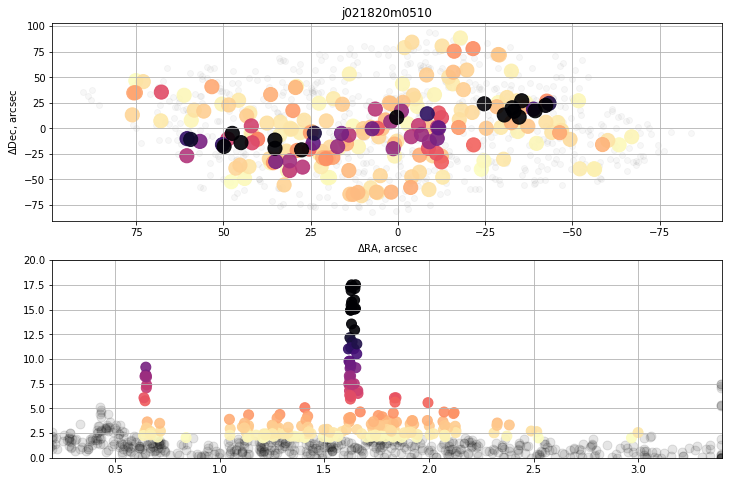

In [24]:
pd_tab.plot.sources(projected_densities, dr, dd, vm=(2, 13))